### FETCH DATA FROM ChEMBL

Fetched 44 rows for target CHEMBL203


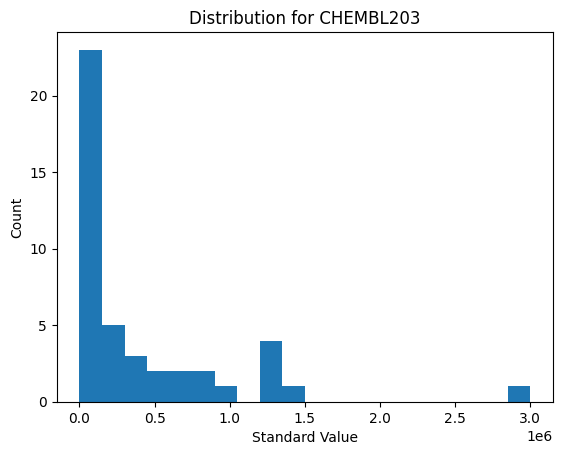

In [4]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt
from tqdm import tqdm

TARGET = "CHEMBL203" #Example: EGFR
LIMIT = 50

activity = new_client.activity
res = activity.filter(target_chembl_id=TARGET).only(
    ["molecule_chembl_id", "canonical_smiles", "standard_type", "standard_value", "standard_units"]
)[:LIMIT]

df = pd.DataFrame(res)
df = df.dropna(subset=["canonical_smiles", "standard_value"])

print(f"Fetched {len(df)} rows for target {TARGET}")
df.head()

# Cell 3: Plot distribution of values
plt.hist(df["standard_value"].astype(float), bins=20)
plt.xlabel("Standard Value")
plt.ylabel("Count")
plt.title(f"Distribution for {TARGET}")
plt.show()
